In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import openpyxl

In [10]:
#   Visualisere og beholde info om XP-points for neste GW, sammenligne med forrige GW. Lagre i excel/CSV fil og oppdatere den for hver runde. 
#   1. Få tak i data-en som skal visualiseres og beholdes.
#    - optimal_plan_data.groupby("week")[["xP"]].sum() 
# 
#    week	xP
#   17	  63.43
#   18	  66.31
#   19	  56.86

optimal_plan_data = pd.read_csv("../output/optimal_plan_regular.csv")
optimal_plan_data.head(16)
# optimal_plan_data.groupby("week")[["xP"]].sum()

,Unnamed: 0,week,name,pos,type,team,buy_price,sell_price,xP,xMin,lineup,bench,captain,vicecaptain,transfer_in,transfer_out
0,4,17,Ward,GKP,1,Leicester,4.1,4.0,3.43,87,1,-1,0,0,0,0
1,1,17,Dunk,DEF,2,Brighton,4.7,4.6,3.71,88,1,-1,0,0,0,0
2,12,17,Trippier,DEF,2,Newcastle,5.9,5.6,3.76,86,1,-1,0,0,0,0
3,7,17,Cancelo,DEF,2,Man City,7.4,7.3,4.24,78,1,-1,0,0,0,0
4,8,17,Foden,MID,3,Man City,8.3,8.3,4.14,59,1,-1,0,0,0,0
5,10,17,Rashford,MID,3,Man Utd,6.7,6.6,4.83,67,1,-1,0,0,0,0
6,0,17,Martinelli,MID,3,Arsenal,6.8,6.8,4.98,80,1,-1,0,0,0,0
7,2,17,Zaha,MID,3,Crystal Palace,7.5,7.3,5.29,85,1,-1,0,1,0,0
8,11,17,Wilson,FWD,4,Newcastle,7.4,7.4,4.28,75,1,-1,0,0,1,0
9,6,17,Darwin,FWD,4,Liverpool,9.0,8.9,4.63,76,1,-1,0,0,0,0


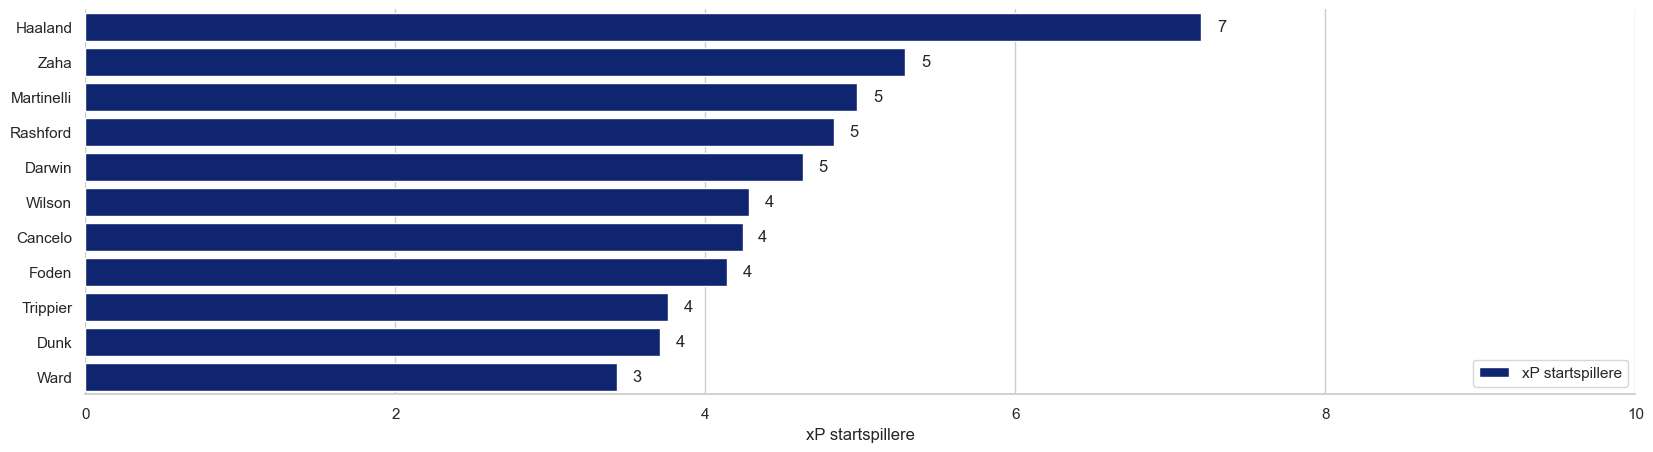

In [11]:
def start_ellever(next_gw, data):
        next_gw= data.loc[(data["week"]==next_gw)& (data['lineup']== 1)]
        return next_gw


gw17_start_players = optimal_plan_data.loc[(optimal_plan_data['week']==17) & (optimal_plan_data['lineup']== 1)]

# sns.barplot(data=gw17_start_players, x="xP", y="name")
sns.set_theme(style="whitegrid", palette="pastel")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 5))


            
sns.set_color_codes("dark")
sns.barplot(x="xP", y="name", data=gw17_start_players.sort_values("xP", ascending=False),label="xP startspillere", color="b")   





           

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
# ax.set(xlim=) her setter jeg størrelsen på figure. Aksen går her fra 0 til 100
ax.set(xlim=(0, 10),  ylabel= "", xlabel="xP startspillere")
sns.despine(left=True, bottom=False)

# # label each bar in barplot https://medium.com/swlh/quick-guide-to-labelling-data-for-common-seaborn-plots-736e10bf14a9
for p in ax.patches: 
        height = p.get_height() # height of each horizontal bar is the same
        width = p.get_width() # width 
        # adding text to each bar
        ax.text(x = width+0.1, # x-coordinate position of data label, padded 1 to right of bar
        y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
        s = "{:.0f}".format(width), # data label, formatted to ignore decimals
        va = "center") # sets vertical alignment (va) to center

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

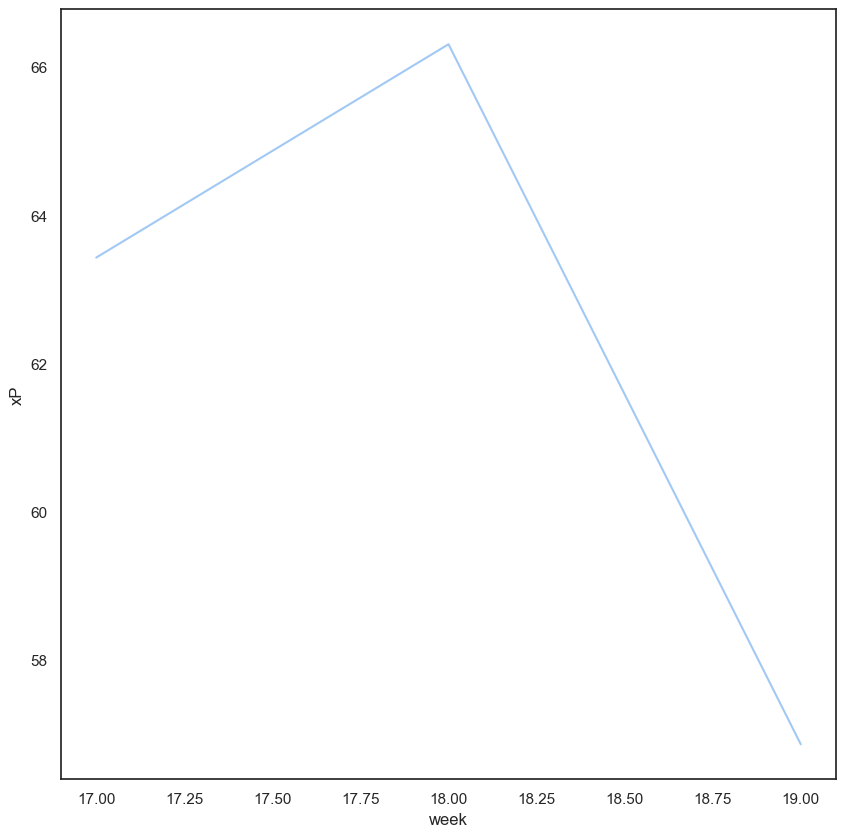

In [32]:
sns.set_theme(style="white", palette="pastel")

sns.lineplot(data=optimal_plan_data.groupby("week").sum(numeric_only=True), x="week", y="xP")

xP =[]
for i in range(1,17):
    xP.append(0)
xP

In [13]:
team_id = "2821496"
current_week = "7"
url = "https://fantasy.premierleague.com/api/entry/"+team_id+"/event/"+current_week+"/picks/"
my_team_data = requests.get(url)
my_team_data = my_team_data.json()
my_team_data["entry_history"]["points"]




0

In [14]:
points=[]
Week=[]
def get_team_points(week, id):
    team_id = id
    current_week = str(week)
    url = "https://fantasy.premierleague.com/api/entry/"+team_id+"/event/"+current_week+"/picks/"
    my_team_data = requests.get(url)
    my_team_data = my_team_data.json()
    Week.append(current_week)
    points.append(my_team_data["entry_history"]["points"])

In [15]:
for i in range(1,17):
    get_team_points(i, "2821496")

In [16]:
print(points)
print(Week)
faktiske_poeng={"Uke":Week, "Poeng":points}

[67, 79, 44, 83, 79, 40, 0, 66, 78, 58, 59, 54, 71, 43, 57, 63]
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']


In [40]:
df_poeng_xP = pd.DataFrame(faktiske_poeng)
df_poeng_xP.set_index("Uke", inplace=True)
df_poeng_xP["xP"]= xP
df_poeng_xP.to_csv("../output/Poengsammendrag")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


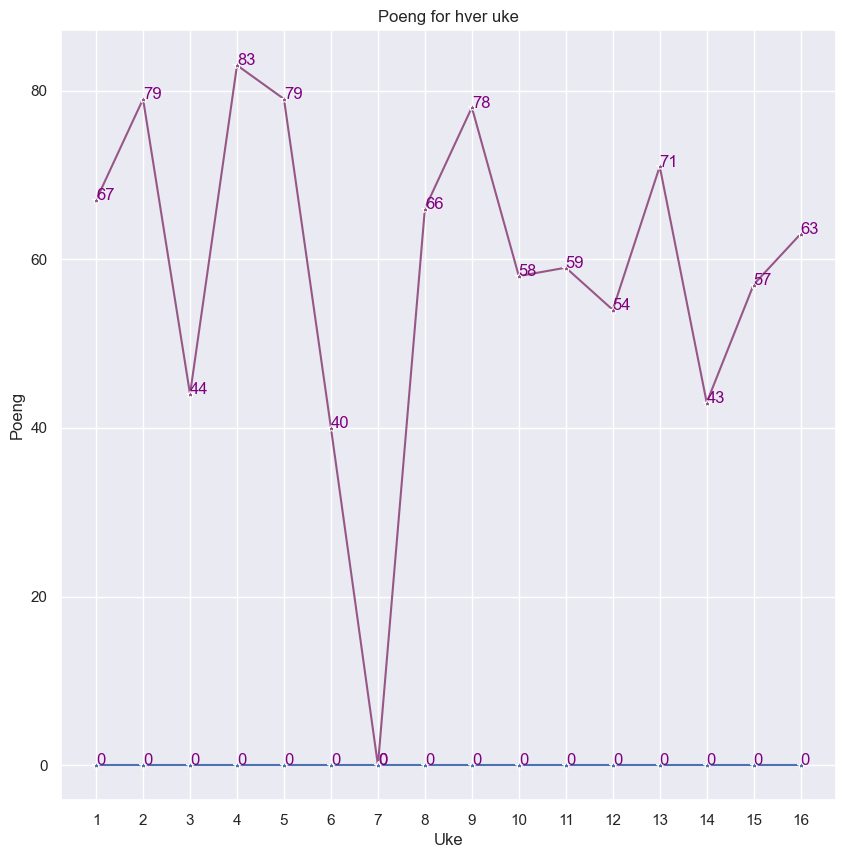

In [34]:
sns.set_theme(style="white", palette="pastel")

# sns.lineplot(data=df_poeng_xP, x="Uke", y="Poeng")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
# ax.set(xlim=) her setter jeg størrelsen på figure. Aksen går her fra 0 til 100
ax.set(xlim=(0, 10),  ylabel= "Poeng", xlabel="xP startspillere")

sns.despine(left=True, bottom=False)

# plot line graph
sns.set(rc={"figure.figsize":(10,10)})
ax = sns.lineplot(data=df_poeng_xP, x="Uke", y="Poeng" ,marker="*", color="#965786")
ax1 = sns.lineplot(data=df_poeng_xP, x="Uke", y="xP" ,marker="*")
ax.set(title="Poeng for hver uke")# label points on the plot
for x, y in zip(df_poeng_xP["Uke"], df_poeng_xP["Poeng"]):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
        plt.text(x = x, # x-coordinate position of data label
        y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
        s = "{:.0f}".format(y), # data label, formatted to ignore decimals
        color = "purple") # set colour of line
for x, y in zip(df_poeng_xP["Uke"], df_poeng_xP["xP"]):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
        plt.text(x = x, # x-coordinate position of data label
        y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
        s = "{:.0f}".format(y), # data label, formatted to ignore decimals
        color = "purple") # set colour of line

In [ ]:
# lage funksjoner som legger inn nye uker. https://pythonexamples.org/pandas-dataframe-add-append-row/